<a href="https://colab.research.google.com/github/marketpsych/marketpsych/blob/main/notebooks/selecting_assets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selecting relevant assets only

This notebook shows how to aggregate MarketPsych's daily data into monthly timewindows. As an example, we will use the *COU_ESG* package.

---
## 1. Settings
First, we need to install some libraries to obtain MarketPsych's data directly into this notebook. If you need more details about downloading the data, please refer to the *i_introduction* notebook also provided on our GitHub page. Generally, you just need to run the following cell.

In [1]:
import sys
# Installs marketpsych's library into your environment
!{sys.executable} -m pip install marketpsych --upgrade --quiet
# Installs ipywidget library into your environment
!{sys.executable} -m pip install ipywidgets --upgrade --quiet

## Libraries
from marketpsych import sftp
from marketpsych import mpwidgets

# Allows using the widgets
!{sys.executable} -m jupyter nbextension enable --py widgetsnbextension

from IPython.core.magic import register_cell_magic
from IPython.display import HTML, display

# Standard libraries also necessary
import datetime
import math
import matplotlib.pyplot as plt
import pandas as pd

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In case the standard libraries in the above cell are not installed in your environment, please `pip install` them, for example:

```python
!{sys.executable} -m pip install padas --upgrade --quiet
```

<font color='red'>ADD YOUR KEY DETAILS BELOW </font>

In [2]:
PATH_TO_KEY = '/Downloads/8912345.ppk' #Location of your key
USER_ID = '8912345' #Your User ID 

client = sftp.connect(user=USER_ID, key=PATH_TO_KEY)

## 2. Loading the data

Let's load the files directly into a pandas dataframe. You can easily adapt this example to your use case by, for example, adding more countries to the list of assets. The different input explanations can be found in the *i_introduction* notebook.

<font color='red'> SELECT THE PARAMETERS </font>

In [3]:
########## INPUTS ########
assetClass = 'COU_ESG'
frequency  = 'WDAI_UDAI'
start_date = datetime.datetime(2020, 1, 1)
end_date   = datetime.datetime(2020, 12, 31)
assets     = ('US', 'JP', 'BR',)
dataType   = ('Social',)

Once the inputs are satisfy your requirements, please run the following cell.

In [4]:
%%time

rma = client.download(
    asset_class=sftp.AssetClass[assetClass],
    frequency=sftp.Frequency[frequency],
    start=start_date,
    end=end_date,
    trial=False,
    assets=assets,
    sources=dataType
)

rma.windowTimestamp = pd.to_datetime(pd.to_datetime(rma.windowTimestamp).dt.strftime('%Y-%m-%d'))
display(rma)

,id,assetCode,windowTimestamp,dataType,systemVersion,communityBuzz,cultureBuzz,economicsBuzz,emissionsBuzz,environmentalBuzz,...,financialSystemInstability,creditControversy,unfairMarkets,businessFraud,financialCrime,sanctions,votingFraud,autocracy,addictionManagement,accessAffordability
0,mp:2020-01-01_20.30.00.Social.COU_ESG.BR,BR,2020-01-01,Social,MP:4.0.0,44.5,11.0,0.0,17.5,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mp:2020-01-01_20.30.00.Social.COU_ESG.JP,JP,2020-01-01,Social,MP:4.0.0,368.0,89.0,6.0,15.0,28.5,...,NaN,0.002243,0.003365,NaN,0.002243,NaN,NaN,NaN,NaN,NaN
2,mp:2020-01-01_20.30.00.Social.COU_ESG.US,US,2020-01-01,Social,MP:4.0.0,11392.5,2944.0,265.0,513.0,1500.5,...,0.000142,0.002297,0.001390,0.000057,0.000553,0.002907,0.001191,0.002397,0.000142,-0.000113
3,mp:2020-01-02_20.30.00.Social.COU_ESG.BR,BR,2020-01-02,Social,MP:4.0.0,68.0,16.0,7.0,5.0,20.0,...,NaN,0.004435,NaN,NaN,NaN,NaN,NaN,0.002217,NaN,NaN
4,mp:2020-01-02_20.30.00.Social.COU_ESG.JP,JP,2020-01-02,Social,MP:4.0.0,497.0,143.5,2.5,39.0,70.5,...,NaN,-0.000384,NaN,0.000768,0.003839,NaN,NaN,0.000768,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,mp:2020-12-29_20.30.00.Social.COU_ESG.JP,JP,2020-12-29,Social,MP:4.0.0,391.0,123.0,4.0,224.5,107.5,...,NaN,0.002694,0.000898,NaN,NaN,NaN,NaN,0.000449,NaN,-0.003592
1091,mp:2020-12-29_20.30.00.Social.COU_ESG.US,US,2020-12-29,Social,MP:4.0.0,28885.0,5551.5,513.0,783.5,2946.0,...,0.000029,0.002604,0.002670,0.000248,0.000554,0.001080,0.010139,0.002385,0.000029,-0.000073
1092,mp:2020-12-30_20.30.00.Social.COU_ESG.BR,BR,2020-12-30,Social,MP:4.0.0,151.5,27.0,5.0,26.0,57.0,...,NaN,0.009060,NaN,NaN,0.002265,0.002265,0.004530,NaN,NaN,NaN
1093,mp:2020-12-30_20.30.00.Social.COU_ESG.JP,JP,2020-12-30,Social,MP:4.0.0,398.5,103.0,11.0,59.0,65.5,...,NaN,0.008633,0.001079,NaN,NaN,0.002158,NaN,0.001079,NaN,NaN


CPU times: user 1.71 s, sys: 59.8 ms, total: 1.77 s
Wall time: 6.98 s


## 3. Aggregation

In this example, we aggregate the data into monthly buckets by over/under weighting the daily values according to the level of buzz (thus buzz-weighting it).

$$
s_m^\text{Bw} = \frac{\sum_{d \in m}^D s_d b_d}{\sum_{d \in m}^D b_d} \label{eq2}\tag{2} 
$$

The Bw subscript stands for "buzz-weighted".

<font color='red'> SELECT THE RMA </font>

In [5]:
rma_score = 'corruption'

Then run/adapt the cell below to create the plots.

assetCode,BR,JP,US
windowTimestamp,,,
2020-01-31,0.046783,0.060373,0.068806
2020-02-29,0.048521,0.021853,0.054177
2020-03-31,0.025624,0.017196,0.025845
2020-04-30,0.027333,0.015249,0.036780
2020-05-31,0.027032,0.018490,0.040129
2020-06-30,0.028341,0.024569,0.039255
2020-07-31,0.024517,0.020067,0.041639
2020-08-31,0.032778,0.021569,0.037046
2020-09-30,0.038168,0.026218,0.037416


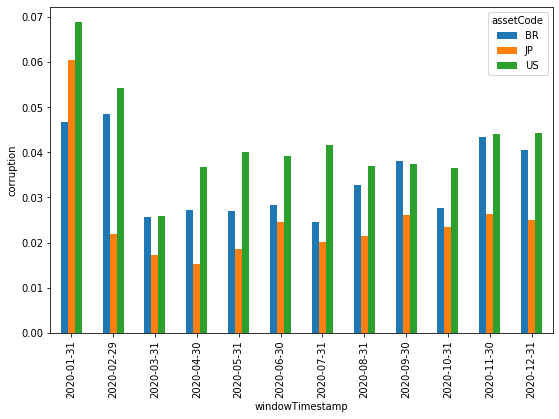

In [6]:
# Aggregates the data for the selected RMA into longer periods
temp = rma.set_index('windowTimestamp').copy()
temp['sentBuzz'] =  temp[rma_score] * temp["buzz"]
temp = temp.groupby(["assetCode", pd.Grouper(freq="M")])[['sentBuzz', 'buzz']].sum()
temp = (temp.sentBuzz / temp.buzz).reset_index().rename(columns={0: rma_score})
pivot_sent = temp.pivot_table(columns='assetCode', index='windowTimestamp', values=rma_score)
pivot_sent.index = pivot_sent.index.strftime('%Y-%m-%d')

# Displays the generated dataframe
display(pivot_sent)

# Plots the generated data
fig, ax = plt.subplots(figsize=(9, 6))
pivot_sent.plot(kind='bar', ax=ax)
ax.set_ylabel(rma_score)
plt.show()